In [258]:
import numpy as np
import pandas as pd

import os
import matplotlib
import numpy as np
from scipy.stats import linregress 
from scipy import stats
import scipy.stats as sts



In [259]:
# Visualization
import hvplot.pandas
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


In [260]:
# Import data
fb1_df = pd.read_csv('../Data/Alicia/fb1_test_data.csv')
fb1_df.head()


,Unnamed: 0,Title,Article,Headline,Title_URL,Image,Facebook_likes,Facebook_comments,Facebook_shares,Comment_replies,results
0,0,CNN,Po Murray writes that the two mass killings in...,Opinion: What has to happen after the Colorado...,https://www.facebook.com/cnn/?__cft__[0]=AZVAV...,https://external-sjc3-1.xx.fbcdn.net/safe_imag...,102,98 Comments,6 Shares,1 Reply,'REAL'
1,1,CNN,Mississippi is one of three states that have e...,More states aim to offer Covid-19 vaccines to ...,https://www.facebook.com/cnn/?__cft__[0]=AZU2o...,https://external-sjc3-1.xx.fbcdn.net/safe_imag...,574,98 Comments,31 Shares,1 Reply,'FAKE'
2,2,CNN,"In 2018, the city of Boulder, Colorado, passed...",Boulder banned assault weapons in 2018. A judg...,https://www.facebook.com/cnn/?__cft__[0]=AZVNa...,https://external-sjc3-1.xx.fbcdn.net/safe_imag...,1.1K,1.2K Comments,119 Shares,112 Replies,'FAKE'
3,3,CNN,"""The life of a single parent is challenging to...",Opinion: My Covid life as a single mom: Like j...,https://www.facebook.com/cnn/?__cft__[0]=AZWhO...,https://external-sjc3-1.xx.fbcdn.net/safe_imag...,554,202 Comments,37 Shares,9 Replies,'FAKE'
4,4,CNN,British people attempting to go on vacation wh...,"New UK law means $7,000 fines for vacations ab...",https://www.facebook.com/cnn/?__cft__[0]=AZXIu...,https://external-sjc3-1.xx.fbcdn.net/safe_imag...,912,390 Comments,83 Shares,View more comments,'FAKE'


In [261]:
# Import data from 
fb2_df = pd.read_csv('../Data/Alicia/fb2_test_data.csv')
fb2_df.head()


,Unnamed: 0,Title,Article,Headline,Title_URL,Image,Facebook_likes,Facebook_comments,Facebook_shares,Comment_replies,results
0,0,Conservative Post,"This program, and the $500 monthly checks it o...",Struggling White Families Not Allowed To Parte...,https://www.facebook.com/heyconservativepost/?...,https://l.facebook.com/l.php?u=https%3A%2F%2Fc...,180,11 Comments,29 Shares,View 40 more comments,'FAKE'
1,1,Conservative Post,Biden appeared to simply give up on what he wa...,The First TV: Biden Lapses Into Nonsense Durin...,https://www.facebook.com/heyconservativepost/?...,https://l.facebook.com/l.php?u=https%3A%2F%2Fc...,220,7 Comments,391 Shares,View previous comments,'FAKE'
2,2,Conservative Post,Right observation! Biden used notes extensivel...,Fox’s Baier: I Haven’t Seen Presidents Flip Th...,https://www.facebook.com/heyconservativepost/?...,https://l.facebook.com/l.php?u=https%3A%2F%2Fc...,128,43 Comments,2.6K Shares,View previous comments,'FAKE'
3,3,Conservative Post,She has been charged with felony obstruction o...,Georgia Dem Arrested After Defying Police and ...,https://www.facebook.com/heyconservativepost/?...,https://l.facebook.com/l.php?u=https%3A%2F%2Fc...,364,64 Comments,43 Shares,View previous comments,'FAKE'
4,4,Conservative Post,Let's go Georgia!,Georgia Governor Signs Into Law Sweeping Elect...,https://www.facebook.com/heyconservativepost/?...,https://l.facebook.com/l.php?u=https%3A%2F%2Fc...,845,58 Comments,1.1K Shares,View previous comments,'REAL'


In [262]:
all_news_df = pd.concat([fb1_df, fb2_df])
all_news_df.head()

,Unnamed: 0,Title,Article,Headline,Title_URL,Image,Facebook_likes,Facebook_comments,Facebook_shares,Comment_replies,results
0,0,CNN,Po Murray writes that the two mass killings in...,Opinion: What has to happen after the Colorado...,https://www.facebook.com/cnn/?__cft__[0]=AZVAV...,https://external-sjc3-1.xx.fbcdn.net/safe_imag...,102,98 Comments,6 Shares,1 Reply,'REAL'
1,1,CNN,Mississippi is one of three states that have e...,More states aim to offer Covid-19 vaccines to ...,https://www.facebook.com/cnn/?__cft__[0]=AZU2o...,https://external-sjc3-1.xx.fbcdn.net/safe_imag...,574,98 Comments,31 Shares,1 Reply,'FAKE'
2,2,CNN,"In 2018, the city of Boulder, Colorado, passed...",Boulder banned assault weapons in 2018. A judg...,https://www.facebook.com/cnn/?__cft__[0]=AZVNa...,https://external-sjc3-1.xx.fbcdn.net/safe_imag...,1.1K,1.2K Comments,119 Shares,112 Replies,'FAKE'
3,3,CNN,"""The life of a single parent is challenging to...",Opinion: My Covid life as a single mom: Like j...,https://www.facebook.com/cnn/?__cft__[0]=AZWhO...,https://external-sjc3-1.xx.fbcdn.net/safe_imag...,554,202 Comments,37 Shares,9 Replies,'FAKE'
4,4,CNN,British people attempting to go on vacation wh...,"New UK law means $7,000 fines for vacations ab...",https://www.facebook.com/cnn/?__cft__[0]=AZXIu...,https://external-sjc3-1.xx.fbcdn.net/safe_imag...,912,390 Comments,83 Shares,View more comments,'FAKE'


In [263]:
# Drop first column
all_news_df = all_news_df.drop(all_news_df.columns[0], axis=1)
all_news_df

,Title,Article,Headline,Title_URL,Image,Facebook_likes,Facebook_comments,Facebook_shares,Comment_replies,results
0,CNN,Po Murray writes that the two mass killings in...,Opinion: What has to happen after the Colorado...,https://www.facebook.com/cnn/?__cft__[0]=AZVAV...,https://external-sjc3-1.xx.fbcdn.net/safe_imag...,102,98 Comments,6 Shares,1 Reply,'REAL'
1,CNN,Mississippi is one of three states that have e...,More states aim to offer Covid-19 vaccines to ...,https://www.facebook.com/cnn/?__cft__[0]=AZU2o...,https://external-sjc3-1.xx.fbcdn.net/safe_imag...,574,98 Comments,31 Shares,1 Reply,'FAKE'
2,CNN,"In 2018, the city of Boulder, Colorado, passed...",Boulder banned assault weapons in 2018. A judg...,https://www.facebook.com/cnn/?__cft__[0]=AZVNa...,https://external-sjc3-1.xx.fbcdn.net/safe_imag...,1.1K,1.2K Comments,119 Shares,112 Replies,'FAKE'
3,CNN,"""The life of a single parent is challenging to...",Opinion: My Covid life as a single mom: Like j...,https://www.facebook.com/cnn/?__cft__[0]=AZWhO...,https://external-sjc3-1.xx.fbcdn.net/safe_imag...,554,202 Comments,37 Shares,9 Replies,'FAKE'
4,CNN,British people attempting to go on vacation wh...,"New UK law means $7,000 fines for vacations ab...",https://www.facebook.com/cnn/?__cft__[0]=AZXIu...,https://external-sjc3-1.xx.fbcdn.net/safe_imag...,912,390 Comments,83 Shares,View more comments,'FAKE'
...,...,...,...,...,...,...,...,...,...,...
934,BuzzFeed Politics,"Joe Biden's announcement, part of a national a...",White House: All US Adults Will Be Eligible Fo...,https://www.facebook.com/BuzzFeedPol/,https://external-sjc3-1.xx.fbcdn.net/safe_imag...,1.1K,588 Comments,314 Shares,View previous comments,'REAL'
935,BuzzFeed Politics,“We will move with a sense of urgency on clima...,Michael Regan Will Be The First Black Man To L...,https://www.facebook.com/BuzzFeedPol/,NaN,5.8K,12K Comments,461 Shares,View 9 more replies,'FAKE'
936,BuzzFeed Politics,Garland has said investigating the Capitol ins...,The Senate Confirmed Merrick Garland As The Ne...,https://www.facebook.com/BuzzFeedPol/,NaN,1.6K,2.9K Comments,275 Shares,7 Replies,'REAL'
937,BuzzFeed Politics,"Checks of $1,400, unemployment benefits, and h...",Congress Just Passed Another Round Of COVID Ch...,https://www.facebook.com/BuzzFeedPol/,https://external-sjc3-1.xx.fbcdn.net/safe_imag...,890,619 Comments,91 Shares,View previous comments,'REAL'


In [264]:
# Split the values to show only numeric without the words like Shares, Comments, Replies
all_news_df["Facebook_likes"] = all_news_df["Facebook_likes"].str.split(" ", n = 1, expand = True)
all_news_df["Facebook_comments"] = all_news_df["Facebook_comments"].str.split(" ", n = 1, expand = True)
all_news_df["Facebook_shares"] = all_news_df["Facebook_shares"].str.split(" ", n = 1, expand = True)
all_news_df["Comment_replies"] = all_news_df["Comment_replies"].str.split(" ", n = 1, expand = True)

In [265]:
# To replace the "view" text from the column "Comment_replies" with zero 
all_news_df["Comment_replies"] = all_news_df["Comment_replies"].replace(to_replace ="View", value ="0")

In [266]:
# Convert the "K" to thousands in numerical 
def value_to_float(x):
    if type(x) == float or type(x) == int:
        return x
    if 'K' in x:
        if len(x) > 1:
            return float(x.replace('K', '')) * 1000
        return 1000
    return x


In [267]:
all_news_df["Facebook_comments"] = all_news_df["Facebook_comments"].apply(value_to_float)
all_news_df["Facebook_likes"] = all_news_df["Facebook_likes"].apply(value_to_float)
all_news_df["Facebook_shares"] = all_news_df["Facebook_shares"].apply(value_to_float)


In [268]:
all_news_df

,Title,Article,Headline,Title_URL,Image,Facebook_likes,Facebook_comments,Facebook_shares,Comment_replies,results
0,CNN,Po Murray writes that the two mass killings in...,Opinion: What has to happen after the Colorado...,https://www.facebook.com/cnn/?__cft__[0]=AZVAV...,https://external-sjc3-1.xx.fbcdn.net/safe_imag...,102,98,6,1,'REAL'
1,CNN,Mississippi is one of three states that have e...,More states aim to offer Covid-19 vaccines to ...,https://www.facebook.com/cnn/?__cft__[0]=AZU2o...,https://external-sjc3-1.xx.fbcdn.net/safe_imag...,574,98,31,1,'FAKE'
2,CNN,"In 2018, the city of Boulder, Colorado, passed...",Boulder banned assault weapons in 2018. A judg...,https://www.facebook.com/cnn/?__cft__[0]=AZVNa...,https://external-sjc3-1.xx.fbcdn.net/safe_imag...,1100.0,1200.0,119,112,'FAKE'
3,CNN,"""The life of a single parent is challenging to...",Opinion: My Covid life as a single mom: Like j...,https://www.facebook.com/cnn/?__cft__[0]=AZWhO...,https://external-sjc3-1.xx.fbcdn.net/safe_imag...,554,202,37,9,'FAKE'
4,CNN,British people attempting to go on vacation wh...,"New UK law means $7,000 fines for vacations ab...",https://www.facebook.com/cnn/?__cft__[0]=AZXIu...,https://external-sjc3-1.xx.fbcdn.net/safe_imag...,912,390,83,0,'FAKE'
...,...,...,...,...,...,...,...,...,...,...
934,BuzzFeed Politics,"Joe Biden's announcement, part of a national a...",White House: All US Adults Will Be Eligible Fo...,https://www.facebook.com/BuzzFeedPol/,https://external-sjc3-1.xx.fbcdn.net/safe_imag...,1100.0,588,314,0,'REAL'
935,BuzzFeed Politics,“We will move with a sense of urgency on clima...,Michael Regan Will Be The First Black Man To L...,https://www.facebook.com/BuzzFeedPol/,NaN,5800.0,12000.0,461,0,'FAKE'
936,BuzzFeed Politics,Garland has said investigating the Capitol ins...,The Senate Confirmed Merrick Garland As The Ne...,https://www.facebook.com/BuzzFeedPol/,NaN,1600.0,2900.0,275,7,'REAL'
937,BuzzFeed Politics,"Checks of $1,400, unemployment benefits, and h...",Congress Just Passed Another Round Of COVID Ch...,https://www.facebook.com/BuzzFeedPol/,https://external-sjc3-1.xx.fbcdn.net/safe_imag...,890,619,91,0,'REAL'


In [269]:
all_news_df.dtypes

Title                object
Article              object
Headline             object
Title_URL            object
Image                object
Facebook_likes       object
Facebook_comments    object
Facebook_shares      object
Comment_replies      object
results              object
dtype: object

In [270]:
# Convert to new csv file
final_cleaned_data = all_news_df.to_csv("final_cleaned_data.csv")
final_cleaned_data


# Import a cleaned CSV file for visualization


In [271]:
# Import data
all_cleaned_news = pd.read_csv('../Data/Alicia/final_categorized_data.csv')
all_cleaned_news


,Unnamed: 0,Title,Article,Headline,Title_URL,Image,Facebook_likes,Facebook_comments,Facebook_shares,Comment_replies,results
0,0,CNN,Po Murray writes that the two mass killings in...,Opinion: What has to happen after the Colorado...,https://www.facebook.com/cnn/?__cft__[0]=AZVAV...,https://external-sjc3-1.xx.fbcdn.net/safe_imag...,102.0,98.0,6.0,1,'REAL'
1,1,CNN,Mississippi is one of three states that have e...,More states aim to offer Covid-19 vaccines to ...,https://www.facebook.com/cnn/?__cft__[0]=AZU2o...,https://external-sjc3-1.xx.fbcdn.net/safe_imag...,574.0,98.0,31.0,1,'FAKE'
2,2,CNN,"In 2018, the city of Boulder, Colorado, passed...",Boulder banned assault weapons in 2018. A judg...,https://www.facebook.com/cnn/?__cft__[0]=AZVNa...,https://external-sjc3-1.xx.fbcdn.net/safe_imag...,1100.0,1200.0,119.0,112,'FAKE'
3,3,CNN,"""The life of a single parent is challenging to...",Opinion: My Covid life as a single mom: Like j...,https://www.facebook.com/cnn/?__cft__[0]=AZWhO...,https://external-sjc3-1.xx.fbcdn.net/safe_imag...,554.0,202.0,37.0,9,'FAKE'
4,4,CNN,British people attempting to go on vacation wh...,"New UK law means $7,000 fines for vacations ab...",https://www.facebook.com/cnn/?__cft__[0]=AZXIu...,https://external-sjc3-1.xx.fbcdn.net/safe_imag...,912.0,390.0,83.0,0,'FAKE'
...,...,...,...,...,...,...,...,...,...,...,...
1977,934,BuzzFeed Politics,"Joe Biden's announcement, part of a national a...",White House: All US Adults Will Be Eligible Fo...,https://www.facebook.com/BuzzFeedPol/,https://external-sjc3-1.xx.fbcdn.net/safe_imag...,1100.0,588.0,314.0,0,'REAL'
1978,935,BuzzFeed Politics,“We will move with a sense of urgency on clima...,Michael Regan Will Be The First Black Man To L...,https://www.facebook.com/BuzzFeedPol/,NaN,5800.0,12000.0,461.0,0,'FAKE'
1979,936,BuzzFeed Politics,Garland has said investigating the Capitol ins...,The Senate Confirmed Merrick Garland As The Ne...,https://www.facebook.com/BuzzFeedPol/,NaN,1600.0,2900.0,275.0,7,'REAL'
1980,937,BuzzFeed Politics,"Checks of $1,400, unemployment benefits, and h...",Congress Just Passed Another Round Of COVID Ch...,https://www.facebook.com/BuzzFeedPol/,https://external-sjc3-1.xx.fbcdn.net/safe_imag...,890.0,619.0,91.0,0,'REAL'


In [238]:
# Drop first column
all_cleaned_news = all_cleaned_news.drop(all_cleaned_news.columns[0], axis=1)
all_cleaned_news

,Article,Headline,Title_URL,Image,Facebook_likes,Facebook_comments,Facebook_shares,Comment_replies,results
0,Po Murray writes that the two mass killings in...,Opinion: What has to happen after the Colorado...,https://www.facebook.com/cnn/?__cft__[0]=AZVAV...,https://external-sjc3-1.xx.fbcdn.net/safe_imag...,102.0,98.0,6.0,1,'REAL'
1,Mississippi is one of three states that have e...,More states aim to offer Covid-19 vaccines to ...,https://www.facebook.com/cnn/?__cft__[0]=AZU2o...,https://external-sjc3-1.xx.fbcdn.net/safe_imag...,574.0,98.0,31.0,1,'FAKE'
2,"In 2018, the city of Boulder, Colorado, passed...",Boulder banned assault weapons in 2018. A judg...,https://www.facebook.com/cnn/?__cft__[0]=AZVNa...,https://external-sjc3-1.xx.fbcdn.net/safe_imag...,1100.0,1200.0,119.0,112,'FAKE'
3,"""The life of a single parent is challenging to...",Opinion: My Covid life as a single mom: Like j...,https://www.facebook.com/cnn/?__cft__[0]=AZWhO...,https://external-sjc3-1.xx.fbcdn.net/safe_imag...,554.0,202.0,37.0,9,'FAKE'
4,British people attempting to go on vacation wh...,"New UK law means $7,000 fines for vacations ab...",https://www.facebook.com/cnn/?__cft__[0]=AZXIu...,https://external-sjc3-1.xx.fbcdn.net/safe_imag...,912.0,390.0,83.0,0,'FAKE'
...,...,...,...,...,...,...,...,...,...
1977,"Joe Biden's announcement, part of a national a...",White House: All US Adults Will Be Eligible Fo...,https://www.facebook.com/BuzzFeedPol/,https://external-sjc3-1.xx.fbcdn.net/safe_imag...,1100.0,588.0,314.0,0,'REAL'
1978,“We will move with a sense of urgency on clima...,Michael Regan Will Be The First Black Man To L...,https://www.facebook.com/BuzzFeedPol/,NaN,5800.0,12000.0,461.0,0,'FAKE'
1979,Garland has said investigating the Capitol ins...,The Senate Confirmed Merrick Garland As The Ne...,https://www.facebook.com/BuzzFeedPol/,NaN,1600.0,2900.0,275.0,7,'REAL'
1980,"Checks of $1,400, unemployment benefits, and h...",Congress Just Passed Another Round Of COVID Ch...,https://www.facebook.com/BuzzFeedPol/,https://external-sjc3-1.xx.fbcdn.net/safe_imag...,890.0,619.0,91.0,0,'REAL'


In [273]:
for_html = all_cleaned_news.to_html("all_cleaned_news.html")
for_html

In [17]:
# Checking how many real/fake news from the 1982 row of data
check_count = all_cleaned_news["results"].value_counts()
check_count


'FAKE'    1477
'REAL'     505
Name: results, dtype: int64

In [18]:
# Make a new dataframe for plotting
check_count = pd.DataFrame(check_count)
check_count

,results
'FAKE',1477
'REAL',505


In [20]:
# Summary of How many Fake & Real News that was tested from the Scraped data
fake_real_count = check_count.hvplot.bar(hover_color="pink", width=800, ylim=(0,1600), title="Summary of Real & Fake News", xlabel="Authenticity", ylabel="Number of News Article").opts(
    yformatter='%0f'
)

fake_real_count

:Bars   [index]   (results)

In [21]:
# Saving the plot
# check_count.hvplot.bar.save('fake_real_count.html')

In [22]:
# This needs further cleaning
all_news_title = all_cleaned_news['Title'].value_counts()
all_news_title

Daily Mail           373
Conservative Post    353
CNN                  350
Fox News             320
BuzzFeed Politics    312
BBC                  274
Name: Title, dtype: int64

In [23]:
# Make a new dataframe for plotting
all_news_title = pd.DataFrame(all_news_title)
all_news_title = all_news_title.sort_values(by='Title', ascending=False)
all_news_title

,Title
Daily Mail,373
Conservative Post,353
CNN,350
Fox News,320
BuzzFeed Politics,312
BBC,274


In [24]:
all_news_summary = all_news_title.hvplot.bar(hover_color="pink", width=800, ylim=(0,400), title="Webscraped data of News channels", xlabel="News Channel", ylabel="Number of News article collected").opts(
    yformatter='%0f'
)

all_news_summary

# plt.figure(figsize=(16,9))
# sns.countplot(x="Title", data=all_cleaned_news)


:Bars   [index]   (Title)

In [253]:
all_cleaned_news.

,Unnamed: 0,Title,Article,Headline,Title_URL,Image,Facebook_likes,Facebook_comments,Facebook_shares,Comment_replies,results
0,0,CNN,Po Murray writes that the two mass killings in...,Opinion: What has to happen after the Colorado...,https://www.facebook.com/cnn/?__cft__[0]=AZVAV...,https://external-sjc3-1.xx.fbcdn.net/safe_imag...,102.0,98.0,6.0,1,'REAL'
1,1,CNN,Mississippi is one of three states that have e...,More states aim to offer Covid-19 vaccines to ...,https://www.facebook.com/cnn/?__cft__[0]=AZU2o...,https://external-sjc3-1.xx.fbcdn.net/safe_imag...,574.0,98.0,31.0,1,'FAKE'
2,2,CNN,"In 2018, the city of Boulder, Colorado, passed...",Boulder banned assault weapons in 2018. A judg...,https://www.facebook.com/cnn/?__cft__[0]=AZVNa...,https://external-sjc3-1.xx.fbcdn.net/safe_imag...,1100.0,1200.0,119.0,112,'FAKE'
3,3,CNN,"""The life of a single parent is challenging to...",Opinion: My Covid life as a single mom: Like j...,https://www.facebook.com/cnn/?__cft__[0]=AZWhO...,https://external-sjc3-1.xx.fbcdn.net/safe_imag...,554.0,202.0,37.0,9,'FAKE'
4,4,CNN,British people attempting to go on vacation wh...,"New UK law means $7,000 fines for vacations ab...",https://www.facebook.com/cnn/?__cft__[0]=AZXIu...,https://external-sjc3-1.xx.fbcdn.net/safe_imag...,912.0,390.0,83.0,0,'FAKE'
...,...,...,...,...,...,...,...,...,...,...,...
1977,934,BuzzFeed Politics,"Joe Biden's announcement, part of a national a...",White House: All US Adults Will Be Eligible Fo...,https://www.facebook.com/BuzzFeedPol/,https://external-sjc3-1.xx.fbcdn.net/safe_imag...,1100.0,588.0,314.0,0,'REAL'
1978,935,BuzzFeed Politics,“We will move with a sense of urgency on clima...,Michael Regan Will Be The First Black Man To L...,https://www.facebook.com/BuzzFeedPol/,NaN,5800.0,12000.0,461.0,0,'FAKE'
1979,936,BuzzFeed Politics,Garland has said investigating the Capitol ins...,The Senate Confirmed Merrick Garland As The Ne...,https://www.facebook.com/BuzzFeedPol/,NaN,1600.0,2900.0,275.0,7,'REAL'
1980,937,BuzzFeed Politics,"Checks of $1,400, unemployment benefits, and h...",Congress Just Passed Another Round Of COVID Ch...,https://www.facebook.com/BuzzFeedPol/,https://external-sjc3-1.xx.fbcdn.net/safe_imag...,890.0,619.0,91.0,0,'REAL'


[Text(0, 0.5, 'Count')]

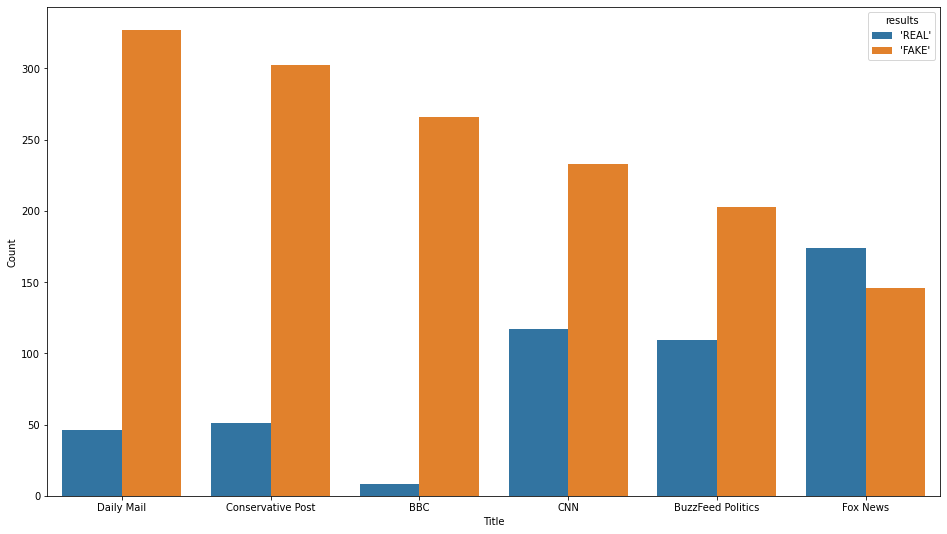

In [255]:
# Summary of real/fake news from various news sources
plt.figure(figsize=(16,9))
summary = sns.countplot(x="Title", hue="results", data=all_cleaned_news, order=['Daily Mail', 'Conservative Post', 'BBC', 'CNN', 'BuzzFeed Politics', 'Fox News'])
summary.set(ylabel="Count")


In [143]:
# The most 'like' of Fake News on Facebook Post 
most_like_fake = all_cleaned_news.sort_values(by='Facebook_likes', ascending=False)
most_like_fake.head(6)


,Title,Article,Headline,Title_URL,Image,Facebook_likes,Facebook_comments,Facebook_shares,Comment_replies,results
1769,BuzzFeed Politics,A retired Black grandmother in her 60s. A whit...,What Jurors In Derek Chauvin’s Trial Think Abo...,https://www.facebook.com/BuzzFeedPol/,https://scontent-sjc3-1.xx.fbcdn.net/v/t1.0-9/...,187000.0,32000.0,23000.0,0,'FAKE'
825,Fox News,Former President Donald Trump released a state...,NaN,https://www.facebook.com/FoxNews/?__cft__[0]=A...,https://scontent-sjc3-1.xx.fbcdn.net/v/t1.0-9/...,187000.0,32000.0,23000.0,0,'REAL'
1617,BBC,A beautiful tribute from Call the Midwife to m...,A beautiful tribute from Call the Midwife to m...,https://www.facebook.com/BuzzFeedPol/,https://external-sjc3-1.xx.fbcdn.net/safe_imag...,134000.0,59000.0,20000.0,0,'FAKE'
1896,BuzzFeed Politics,“Come to the South Side of the Capitol on step...,Prosecutors Say The Oath Keepers’ Leader Direc...,https://www.facebook.com/BuzzFeedPol/,https://external-sjc3-1.xx.fbcdn.net/safe_imag...,134000.0,59000.0,20000.0,0,'FAKE'
955,Fox News,The White House seemingly turned down an invit...,White House says Biden is 'quite busy' after P...,https://www.facebook.com/FoxNews/?__cft__[0]=A...,https://external-sjc3-1.xx.fbcdn.net/safe_imag...,134000.0,59000.0,20000.0,0,'FAKE'
844,Fox News,JUST IN: Former President Donald Trump will be...,Trump returning to social media with 'his own ...,https://www.facebook.com/FoxNews/?__cft__[0]=A...,https://external-sjc3-1.xx.fbcdn.net/safe_imag...,121000.0,16000.0,9000.0,0,'FAKE'


## Top 5 Fake News (Most-Like Posts) 

In [148]:
# Select the top 5 of Fake News that get the most like 
top5fake_like = most_like_fake.loc[most_like_fake["results"]=="'FAKE'"]
top5fake_like = top5fake_like.head(5)
top5fake_like


,Title,Article,Headline,Title_URL,Image,Facebook_likes,Facebook_comments,Facebook_shares,Comment_replies,results
1769,BuzzFeed Politics,A retired Black grandmother in her 60s. A whit...,What Jurors In Derek Chauvin’s Trial Think Abo...,https://www.facebook.com/BuzzFeedPol/,https://scontent-sjc3-1.xx.fbcdn.net/v/t1.0-9/...,187000.0,32000.0,23000.0,0,'FAKE'
1617,BBC,A beautiful tribute from Call the Midwife to m...,A beautiful tribute from Call the Midwife to m...,https://www.facebook.com/BuzzFeedPol/,https://external-sjc3-1.xx.fbcdn.net/safe_imag...,134000.0,59000.0,20000.0,0,'FAKE'
1896,BuzzFeed Politics,“Come to the South Side of the Capitol on step...,Prosecutors Say The Oath Keepers’ Leader Direc...,https://www.facebook.com/BuzzFeedPol/,https://external-sjc3-1.xx.fbcdn.net/safe_imag...,134000.0,59000.0,20000.0,0,'FAKE'
955,Fox News,The White House seemingly turned down an invit...,White House says Biden is 'quite busy' after P...,https://www.facebook.com/FoxNews/?__cft__[0]=A...,https://external-sjc3-1.xx.fbcdn.net/safe_imag...,134000.0,59000.0,20000.0,0,'FAKE'
844,Fox News,JUST IN: Former President Donald Trump will be...,Trump returning to social media with 'his own ...,https://www.facebook.com/FoxNews/?__cft__[0]=A...,https://external-sjc3-1.xx.fbcdn.net/safe_imag...,121000.0,16000.0,9000.0,0,'FAKE'


In [256]:


top5Fake_likebar = top5fake_like.hvplot.bar(x="Title", y="Facebook_likes", stacked=True, legend='top_left', width=800, ylim=(0,210000), c='Facebook_likes', title="Top 5 Most-Like Fake News Post", xlabel="News Title", ylabel="Number of Likes").opts(
    yformatter='%0f'
)

top5Fake_likebar



:Bars   [Title]   (Facebook_likes)

In [257]:

hvplot.save(top5Fake_likebar, 'top5Fake_likebar.html')

In [196]:
# The most 'share' of Fake News on Facebook Post 
most_share_fake = all_cleaned_news.sort_values(by='Facebook_shares', ascending=False)
most_share_fake.head()

,Title,Article,Headline,Title_URL,Image,Facebook_likes,Facebook_comments,Facebook_shares,Comment_replies,results
1506,BBC,Vertical farms are popping up all over the world.,Vertical farms are popping up all over the world.,https://www.facebook.com/bbc/?hc_ref=ARRg-FFUN...,https://www.facebook.com/bbc/?ref=nf&hc_ref=AR...,1100.0,37.0,30000.0,0,'FAKE'
1783,BuzzFeed Politics,“What we’ve seen over the decades with the Cap...,The Capitol Police Released Its Annual Public ...,https://www.facebook.com/BuzzFeedPol/,https://external-sjc3-1.xx.fbcdn.net/safe_imag...,91000.0,41000.0,30000.0,0,'REAL'
1211,Conservative Post,Tucker is on FIRE,Tucker Carlson: From Andrew Cuomo To The Linco...,https://www.facebook.com/heyconservativepost/?...,https://l.facebook.com/l.php?u=https%3A%2F%2Fc...,204.0,37.0,30000.0,0,'FAKE'
839,Fox News,Immigration and Customs Enforcement is securin...,Biden administration awards ICE $86M contract ...,https://www.facebook.com/FoxNews/?__cft__[0]=A...,https://external-sjc3-1.xx.fbcdn.net/safe_imag...,91000.0,41000.0,30000.0,0,'FAKE'
887,Fox News,Rep. Burgess Owens tweeted out his criticism o...,NaN,https://www.facebook.com/FoxNews/?__cft__[0]=A...,https://scontent-sjc3-1.xx.fbcdn.net/v/t1.0-9/...,91000.0,9000.0,24000.0,0,'REAL'


## Top 5 Fake News (Most-Share Posts)

In [197]:
top5fake_share = most_share_fake.loc[most_share_fake["results"]=="'FAKE'"]
top5fake_share = top5fake_share.head(5)
top5fake_share

,Title,Article,Headline,Title_URL,Image,Facebook_likes,Facebook_comments,Facebook_shares,Comment_replies,results
1506,BBC,Vertical farms are popping up all over the world.,Vertical farms are popping up all over the world.,https://www.facebook.com/bbc/?hc_ref=ARRg-FFUN...,https://www.facebook.com/bbc/?ref=nf&hc_ref=AR...,1100.0,37.0,30000.0,0,'FAKE'
1211,Conservative Post,Tucker is on FIRE,Tucker Carlson: From Andrew Cuomo To The Linco...,https://www.facebook.com/heyconservativepost/?...,https://l.facebook.com/l.php?u=https%3A%2F%2Fc...,204.0,37.0,30000.0,0,'FAKE'
839,Fox News,Immigration and Customs Enforcement is securin...,Biden administration awards ICE $86M contract ...,https://www.facebook.com/FoxNews/?__cft__[0]=A...,https://external-sjc3-1.xx.fbcdn.net/safe_imag...,91000.0,41000.0,30000.0,0,'FAKE'
1829,BuzzFeed Politics,Caitlin also promises she does not support or ...,This Woman Also Got A Hilariously Unfortunate ...,https://www.facebook.com/BuzzFeedPol/,https://scontent-sjc3-1.xx.fbcdn.net/v/t1.0-9/...,91000.0,9000.0,24000.0,0,'FAKE'
1259,Conservative Post,"'Once I started making money, I had this silen...","Tim Allen Rips American Tax System, Says He ‘L...",https://www.facebook.com/heyconservativepost/?...,https://l.facebook.com/l.php?u=https%3A%2F%2Fc...,203.0,9000.0,24000.0,0,'FAKE'


In [207]:

top5Fake_sharebar = top5fake_share.hvplot.bar(hover_color="green", x="Title", y="Facebook_shares", stacked=True, legend='top_left', width=800, ylim=(0,32000), c='Facebook_shares', title="Top 5 Most-Shared Fake News Post", xlabel="News Title", ylabel="Number of Shares").opts(
    yformatter='%0f'
)

top5Fake_sharebar



:Bars   [Title]   (Facebook_shares)

In [208]:
# The most 'comment' of Fake News on Facebook Post 
most_comment_fake = all_cleaned_news.sort_values(by='Facebook_comments', ascending=False)
most_comment_fake.head()

,Title,Article,Headline,Title_URL,Image,Facebook_likes,Facebook_comments,Facebook_shares,Comment_replies,results
1283,Conservative Post,Permit-less gun carry bill...,Gov. Bill Lee Pushes For Permit-Less Gun Carry...,https://www.facebook.com/heyconservativepost/?...,https://l.facebook.com/l.php?u=https%3A%2F%2Fc...,58.0,60000.0,3700.0,0,'FAKE'
1852,BuzzFeed Politics,"Photographer T?y? Miyatake, who was forced int...",These Photos Show The US Has A Long History Of...,https://www.facebook.com/BuzzFeedPol/,https://scontent-sjc3-1.xx.fbcdn.net/v/t1.0-9/...,55000.0,60000.0,3700.0,0,'FAKE'
1575,BBC,Costa Rica is one of the countries that recogn...,Costa Rica is one of the countries that recogn...,https://www.facebook.com/BuzzFeedPol/,https://scontent-sjc3-1.xx.fbcdn.net/v/t1.0-9/...,55000.0,60000.0,3700.0,0,'FAKE'
911,Fox News,Former President Barack Obama called for tight...,NaN,https://www.facebook.com/FoxNews/?__cft__[0]=A...,https://scontent-sjc3-1.xx.fbcdn.net/v/t1.0-9/...,55000.0,60000.0,3700.0,0,'REAL'
955,Fox News,The White House seemingly turned down an invit...,White House says Biden is 'quite busy' after P...,https://www.facebook.com/FoxNews/?__cft__[0]=A...,https://external-sjc3-1.xx.fbcdn.net/safe_imag...,134000.0,59000.0,20000.0,0,'FAKE'


## Top 5 Fake News (Most-comment Posts)

In [209]:
top5fake_comment = most_comment_fake.loc[most_comment_fake["results"]=="'FAKE'"]
top5fake_comment = top5fake_comment.head(5)
top5fake_comment

,Title,Article,Headline,Title_URL,Image,Facebook_likes,Facebook_comments,Facebook_shares,Comment_replies,results
1283,Conservative Post,Permit-less gun carry bill...,Gov. Bill Lee Pushes For Permit-Less Gun Carry...,https://www.facebook.com/heyconservativepost/?...,https://l.facebook.com/l.php?u=https%3A%2F%2Fc...,58.0,60000.0,3700.0,0,'FAKE'
1852,BuzzFeed Politics,"Photographer T?y? Miyatake, who was forced int...",These Photos Show The US Has A Long History Of...,https://www.facebook.com/BuzzFeedPol/,https://scontent-sjc3-1.xx.fbcdn.net/v/t1.0-9/...,55000.0,60000.0,3700.0,0,'FAKE'
1575,BBC,Costa Rica is one of the countries that recogn...,Costa Rica is one of the countries that recogn...,https://www.facebook.com/BuzzFeedPol/,https://scontent-sjc3-1.xx.fbcdn.net/v/t1.0-9/...,55000.0,60000.0,3700.0,0,'FAKE'
955,Fox News,The White House seemingly turned down an invit...,White House says Biden is 'quite busy' after P...,https://www.facebook.com/FoxNews/?__cft__[0]=A...,https://external-sjc3-1.xx.fbcdn.net/safe_imag...,134000.0,59000.0,20000.0,0,'FAKE'
1896,BuzzFeed Politics,“Come to the South Side of the Capitol on step...,Prosecutors Say The Oath Keepers’ Leader Direc...,https://www.facebook.com/BuzzFeedPol/,https://external-sjc3-1.xx.fbcdn.net/safe_imag...,134000.0,59000.0,20000.0,0,'FAKE'


In [210]:

top5Fake_commentbar = top5fake_comment.hvplot.bar(hover_color="green", x="Title", y="Facebook_comments", stacked=True, legend='top_left', width=800, ylim=(0,65000), c='Facebook_comments', title="Top 5 Most-Commented Fake News Post", xlabel="News Title", ylabel="Number of Comments").opts(
    yformatter='%0f'
)

top5Fake_commentbar



:Bars   [Title]   (Facebook_comments)

In [211]:
# The most 'like' of Real News on Facebook Post 
most_like_real = all_cleaned_news.sort_values(by='Facebook_likes', ascending=False)
# most_like_real = most_like_real.iloc[1]
# most_like_real = pd.DataFrame(most_like_real)
# most_like_real = most_like_real.T
most_like_real.head(3)


,Title,Article,Headline,Title_URL,Image,Facebook_likes,Facebook_comments,Facebook_shares,Comment_replies,results
1769,BuzzFeed Politics,A retired Black grandmother in her 60s. A whit...,What Jurors In Derek Chauvin’s Trial Think Abo...,https://www.facebook.com/BuzzFeedPol/,https://scontent-sjc3-1.xx.fbcdn.net/v/t1.0-9/...,187000.0,32000.0,23000.0,0,'FAKE'
825,Fox News,Former President Donald Trump released a state...,NaN,https://www.facebook.com/FoxNews/?__cft__[0]=A...,https://scontent-sjc3-1.xx.fbcdn.net/v/t1.0-9/...,187000.0,32000.0,23000.0,0,'REAL'
1617,BBC,A beautiful tribute from Call the Midwife to m...,A beautiful tribute from Call the Midwife to m...,https://www.facebook.com/BuzzFeedPol/,https://external-sjc3-1.xx.fbcdn.net/safe_imag...,134000.0,59000.0,20000.0,0,'FAKE'


## Top 5 Real News (Most-like Posts)

In [212]:
top5real_like = most_like_real.loc[most_like_real["results"]=="'REAL'"]
top5real_like = top5real_like.head(5)
top5real_like

,Title,Article,Headline,Title_URL,Image,Facebook_likes,Facebook_comments,Facebook_shares,Comment_replies,results
825,Fox News,Former President Donald Trump released a state...,NaN,https://www.facebook.com/FoxNews/?__cft__[0]=A...,https://scontent-sjc3-1.xx.fbcdn.net/v/t1.0-9/...,187000.0,32000.0,23000.0,0,'REAL'
1566,BBC,The moment when Sir David Attenborough got ups...,The moment when Sir David Attenborough got ups...,https://www.facebook.com/BuzzFeedPol/,https://external-sjc3-1.xx.fbcdn.net/safe_imag...,119000.0,23000.0,16000.0,0,'REAL'
1843,BuzzFeed Politics,Facebook’s rules to combat misinformation and ...,“Mark Changed The Rules”: How Facebook Went Ea...,https://www.facebook.com/BuzzFeedPol/,https://external-sjc3-1.xx.fbcdn.net/safe_imag...,119000.0,23000.0,16000.0,0,'REAL'
1901,BuzzFeed Politics,"""My wife looked over at me and said she wished...",Asylum-Seekers Trump Forced To Wait In Mexico ...,https://www.facebook.com/BuzzFeedPol/,https://external-sjc3-1.xx.fbcdn.net/safe_imag...,115000.0,32000.0,17000.0,0,'REAL'
1783,BuzzFeed Politics,“What we’ve seen over the decades with the Cap...,The Capitol Police Released Its Annual Public ...,https://www.facebook.com/BuzzFeedPol/,https://external-sjc3-1.xx.fbcdn.net/safe_imag...,91000.0,41000.0,30000.0,0,'REAL'


In [216]:
top5real_likebar = top5real_like.hvplot.bar(hover_color="pink", x="Title", y="Facebook_likes", stacked=True, legend='top_left', width=800, ylim=(0,200000), c='Facebook_likes', title="Top 5 Most-Like Real News Post", xlabel="News Title", ylabel="Number of Likes").opts(
    yformatter='%0f'
)

top5real_likebar



:Bars   [Title]   (Facebook_likes)

In [217]:
# The most 'share' of Real News on Facebook Post 
most_share_real = all_cleaned_news.sort_values(by='Facebook_shares', ascending=False)
# most_share_real = most_share_real.iloc[1]
# most_share_real = pd.DataFrame(most_share_real)
# most_share_real = most_share_real.T
most_share_real.head(2)


,Title,Article,Headline,Title_URL,Image,Facebook_likes,Facebook_comments,Facebook_shares,Comment_replies,results
1506,BBC,Vertical farms are popping up all over the world.,Vertical farms are popping up all over the world.,https://www.facebook.com/bbc/?hc_ref=ARRg-FFUN...,https://www.facebook.com/bbc/?ref=nf&hc_ref=AR...,1100.0,37.0,30000.0,0,'FAKE'
1783,BuzzFeed Politics,“What we’ve seen over the decades with the Cap...,The Capitol Police Released Its Annual Public ...,https://www.facebook.com/BuzzFeedPol/,https://external-sjc3-1.xx.fbcdn.net/safe_imag...,91000.0,41000.0,30000.0,0,'REAL'


## Top 5 Real News (Most-share Posts)

In [219]:

top5real_share = most_share_real.loc[most_share_real["results"]=="'REAL'"]
top5real_share = top5real_share.head(5)
top5real_share

,Title,Article,Headline,Title_URL,Image,Facebook_likes,Facebook_comments,Facebook_shares,Comment_replies,results
1783,BuzzFeed Politics,“What we’ve seen over the decades with the Cap...,The Capitol Police Released Its Annual Public ...,https://www.facebook.com/BuzzFeedPol/,https://external-sjc3-1.xx.fbcdn.net/safe_imag...,91000.0,41000.0,30000.0,0,'REAL'
887,Fox News,Rep. Burgess Owens tweeted out his criticism o...,NaN,https://www.facebook.com/FoxNews/?__cft__[0]=A...,https://scontent-sjc3-1.xx.fbcdn.net/v/t1.0-9/...,91000.0,9000.0,24000.0,0,'REAL'
825,Fox News,Former President Donald Trump released a state...,NaN,https://www.facebook.com/FoxNews/?__cft__[0]=A...,https://scontent-sjc3-1.xx.fbcdn.net/v/t1.0-9/...,187000.0,32000.0,23000.0,0,'REAL'
1938,BuzzFeed Politics,"In his first White House press conference, Bid...",Biden’s Says The Filibuster Is A Jim Crow Relic,https://www.facebook.com/BuzzFeedPol/,https://external-sjc3-1.xx.fbcdn.net/safe_imag...,36000.0,17000.0,20000.0,0,'REAL'
1901,BuzzFeed Politics,"""My wife looked over at me and said she wished...",Asylum-Seekers Trump Forced To Wait In Mexico ...,https://www.facebook.com/BuzzFeedPol/,https://external-sjc3-1.xx.fbcdn.net/safe_imag...,115000.0,32000.0,17000.0,0,'REAL'


In [220]:

top5real_sharebar = top5real_share.hvplot.bar(hover_color="green", x="Title", y="Facebook_shares", stacked=True, legend='top_left', width=800, ylim=(0,32000), c='Facebook_shares', title="Top 5 Most-Shared Real News Post", xlabel="News Title", ylabel="Number of Shares").opts(
    yformatter='%0f'
)

top5real_sharebar



:Bars   [Title]   (Facebook_shares)

In [221]:
# The most 'comment' of Real News on Facebook Post 
most_comment_real = all_cleaned_news.sort_values(by='Facebook_comments', ascending=False)
# most_comment_real = most_comment_real.iloc[3]
# most_comment_real = pd.DataFrame(most_comment_real)
# most_comment_real = most_comment_real.T
most_comment_real.head(2)


,Title,Article,Headline,Title_URL,Image,Facebook_likes,Facebook_comments,Facebook_shares,Comment_replies,results
1283,Conservative Post,Permit-less gun carry bill...,Gov. Bill Lee Pushes For Permit-Less Gun Carry...,https://www.facebook.com/heyconservativepost/?...,https://l.facebook.com/l.php?u=https%3A%2F%2Fc...,58.0,60000.0,3700.0,0,'FAKE'
1852,BuzzFeed Politics,"Photographer T?y? Miyatake, who was forced int...",These Photos Show The US Has A Long History Of...,https://www.facebook.com/BuzzFeedPol/,https://scontent-sjc3-1.xx.fbcdn.net/v/t1.0-9/...,55000.0,60000.0,3700.0,0,'FAKE'


## Top 5 Real News (Most-commented Posts)



In [223]:
top5real_comment = most_comment_real.loc[most_comment_real["results"]=="'REAL'"]
top5real_comment = top5real_comment.head(5)
top5real_comment

,Title,Article,Headline,Title_URL,Image,Facebook_likes,Facebook_comments,Facebook_shares,Comment_replies,results
911,Fox News,Former President Barack Obama called for tight...,NaN,https://www.facebook.com/FoxNews/?__cft__[0]=A...,https://scontent-sjc3-1.xx.fbcdn.net/v/t1.0-9/...,55000.0,60000.0,3700.0,0,'REAL'
1772,BuzzFeed Politics,"Ten people, including one police officer, were...",Powerful Scenes From The Colorado Shooting Tha...,https://www.facebook.com/BuzzFeedPol/,https://external-sjc3-1.xx.fbcdn.net/safe_imag...,68000.0,43000.0,15000.0,0,'REAL'
1783,BuzzFeed Politics,“What we’ve seen over the decades with the Cap...,The Capitol Police Released Its Annual Public ...,https://www.facebook.com/BuzzFeedPol/,https://external-sjc3-1.xx.fbcdn.net/safe_imag...,91000.0,41000.0,30000.0,0,'REAL'
947,Fox News,President Biden stumbled twice and fell as he ...,"Biden stumbles multiple times, falls as he sca...",https://www.facebook.com/FoxNews/?__cft__[0]=A...,https://external-sjc3-1.xx.fbcdn.net/safe_imag...,73000.0,40000.0,12000.0,0,'REAL'
842,Fox News,"""What we are seeing is the result of President...","Mayorkas blames migrant surge on Trump admin, ...",https://www.facebook.com/FoxNews/?__cft__[0]=A...,https://external-sjc3-1.xx.fbcdn.net/safe_imag...,67000.0,34000.0,3800.0,0,'REAL'


In [227]:

top5real_commentbar = top5real_comment.hvplot.bar(hover_color="green", x="Title", y="Facebook_comments", stacked=True, legend='top_left', width=800, ylim=(0,65000), c='Facebook_comments', title="Top 5 Most-Commented Real News Post", xlabel="News Title", ylabel="Number of Shares").opts(
    yformatter='%0f'
)

top5real_commentbar



:Bars   [Title]   (Facebook_comments)